In [1]:
import numpy as np

In [2]:
def estimatePi(N=100):
    x = -1 + 2*np.random.rand(N)
    y = -1 + 2*np.random.rand(N)
    inside = (x**2 + y**2 < 1).sum()
    frac = inside*1./N
    pi = frac*4
    return pi

In [3]:
for N in [100,1000,10000,1000000]:
    print(N, estimatePi(N))

(100, 2.96)
(1000, 3.1920000000000002)
(10000, 3.1520000000000001)
(1000000, 3.1428120000000002)


In [4]:
%timeit estimatePi(10000)

1000 loops, best of 3: 294 µs per loop


/Users/pmelchior/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/matplotlib/figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


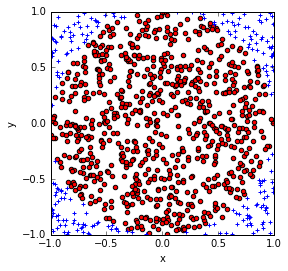

In [5]:
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

N = 1000
fig = plt.figure()
ax = fig.add_subplot(111, aspect='equal')
x = -1 + 2*np.random.rand(N)
y = -1 + 2*np.random.rand(N)
inside = (x**2 + y**2 < 1)
ax.scatter(x[inside], y[inside], c='r', marker='o')
ax.scatter(x[~inside], y[~inside], c='b', marker='+')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_xlim(-1,1)
ax.set_ylim(-1,1)
fig.show()

(3.1411040000000003, 0.052556685435822564)


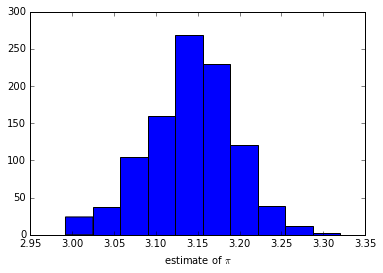

In [6]:
N_runs = 1000
N_bins = 10
estimates = [estimatePi(N) for i in xrange(N_runs)]
fig = plt.figure()
ax = fig.add_subplot(111)
ax.hist(estimates, N_bins)
ax.set_xlabel('estimate of $\pi$')
fig.show()
estimates = np.array(estimates)
print (estimates.mean(), estimates.std())

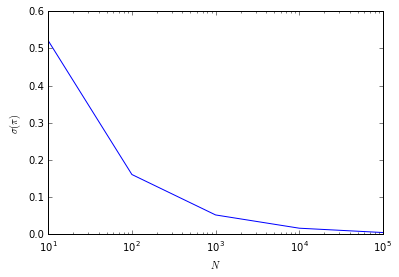

In [11]:
def piStd(N=100, N_runs=1000):
    estimates = np.array([estimatePi(N) for i in xrange(N_runs)])
    return estimates.std()

Ns = [10, 100, 1000, 10000, 100000]#, 1000000]
stds = [piStd(N) for N in Ns]
fig = plt.figure()
ax = fig.add_subplot(111)
ax.semilogx(Ns, stds)
ax.set_xlabel('$N$')
ax.set_ylabel('$\sigma(\pi)$')
fig.show()